In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('kc_house_data.csv')

# 1. Feature Exploration

In [83]:
df.shape

(21613, 21)

In [81]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [82]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [79]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


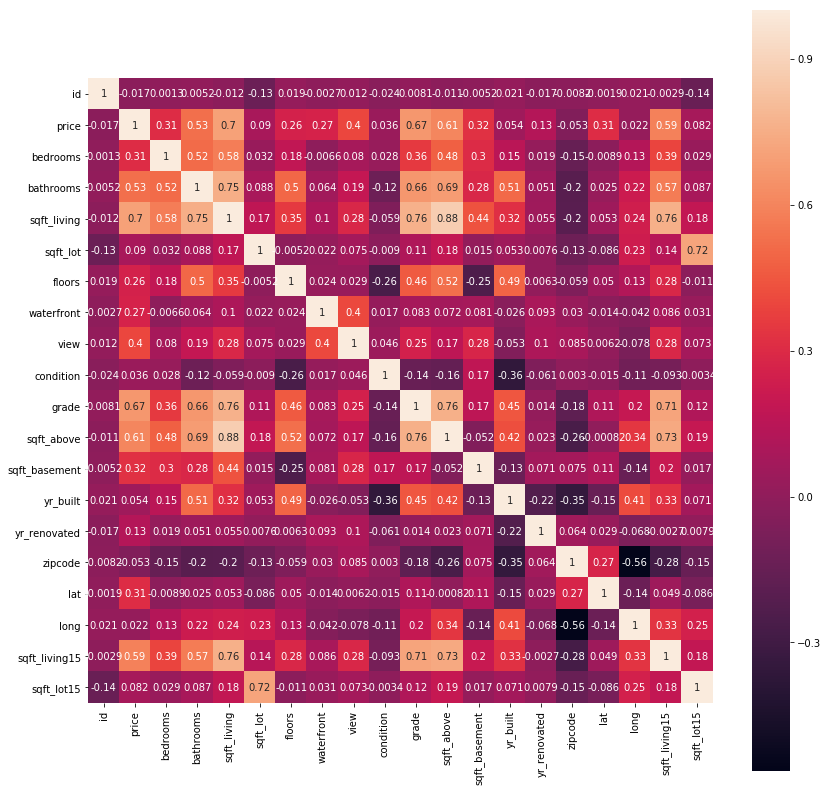

In [80]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),vmax=1.0,square=True,annot=True)
plt.show()

In [84]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [97]:
df['waterfront'].mean()

0.007541757275713691

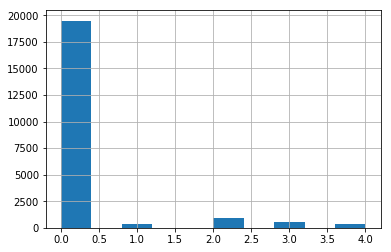

In [102]:
df['view'].hist()
plt.show()

In [240]:
# convert date
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.weekday

In [241]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_week
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2


In [226]:
df_date = df.groupby('date', as_index=False).count()

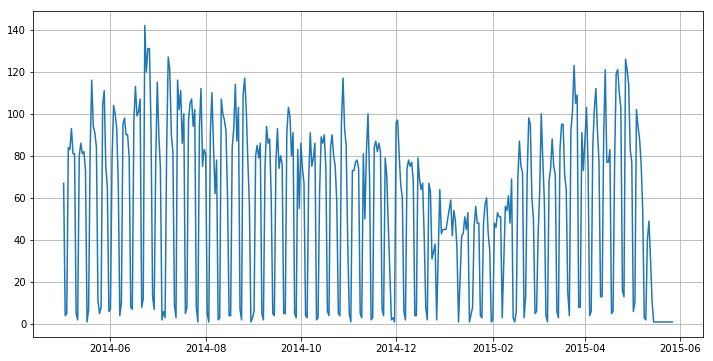

In [251]:
plt.figure(figsize=(12,6))
plt.plot(df_date['date'], df_date['id'])
plt.grid()
plt.show()

In [242]:
df_week = df.groupby('day_of_week', as_index=False).count()

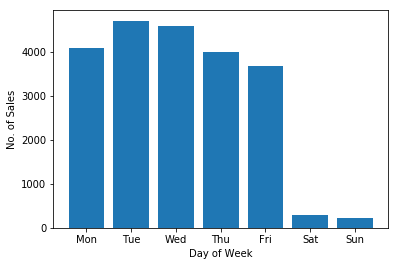

In [250]:
plt.bar(df_week['day_of_week'], df_week['id'])
plt.xlabel('Day of Week')
plt.ylabel('No. of Sales')
plt.xticks(np.arange(7), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat','Sun'))
plt.show()

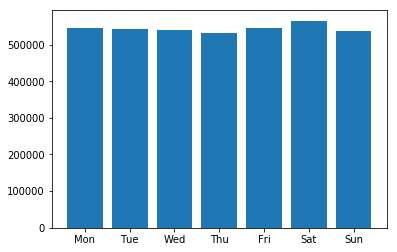

In [266]:
# Average sales price broken down by day of the week
plt.bar(df.groupby('day_of_week', as_index=False).mean()['day_of_week'],
        df.groupby('day_of_week', as_index=False).mean()['price'])
plt.xticks(np.arange(7), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat','Sun'))
plt.show()

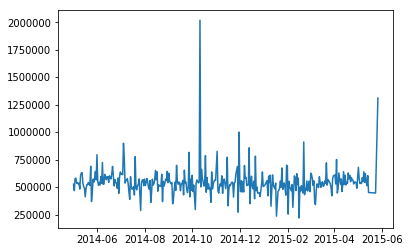

In [270]:
# Average price paid broken down by day
plt.plot(df.groupby('date', as_index=False).mean()['date'],
         df.groupby('date', as_index=False).mean()['price'])
plt.show()

In [272]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_week
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2


In [297]:
df['price'].median()

450000.0

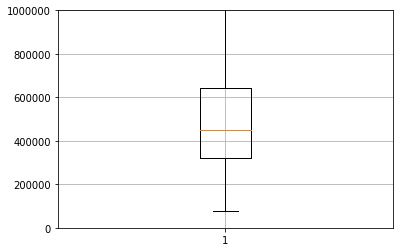

In [294]:
plt.boxplot(df['price'])
plt.ylim(0,1000000)
plt.grid()
plt.show()

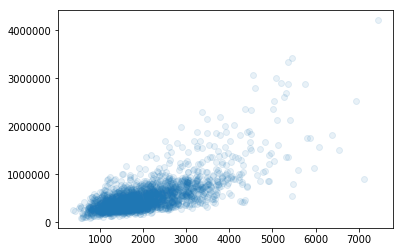

In [291]:
plt.scatter(df[::10]['sqft_living'], df[::10]['price'], alpha=0.1)
plt.show()

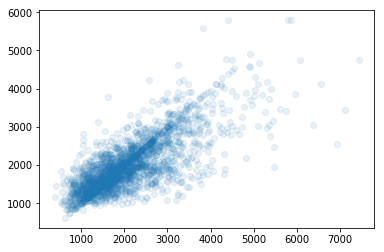

In [290]:
plt.scatter(df[::10]['sqft_living'], df[::10]['sqft_living15'], alpha=0.1)
#plt.plot([0,6000], [0,6000])
plt.show()

# 2. Simple Model

In [105]:
# Features that don't seem relevant: id, (lat, lon), zipcode, (date), sqft_living15, qft_lot15
X = df.drop(['id','lat','long','zipcode','date','sqft_living15',
             'sqft_lot15','price','waterfront','view','yr_renovated'], axis=1)

In [88]:
y = df['price']

In [107]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built
0,3,1.00,1180,5650,1.0,3,7,1180,0,1955
1,3,2.25,2570,7242,2.0,3,7,2170,400,1951
2,2,1.00,770,10000,1.0,3,6,770,0,1933
3,4,3.00,1960,5000,1.0,5,7,1050,910,1965
4,3,2.00,1680,8080,1.0,3,8,1680,0,1987


In [130]:
lin_reg = LinearRegression()
cvs = cross_val_score(estimator=lin_reg, X=X, y=y, cv=10, scoring='r2')

In [133]:
print('%.3f pm %.3f' % (cvs.mean(), cvs.std()))

0.613 pm 0.017


In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.25, random_state=0)
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)


In [164]:
lin_reg.score(X_train, y_train)

0.617054876072008

In [172]:
y_pred = lin_reg.predict(X_test)

In [167]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [170]:
r2_score(y_pred, y_train)

0.37939859358063854

In [173]:
r2_score(y_test, y_pred)

0.6187326582027115

In [136]:
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [138]:
pd.Series(lin_reg.coef_, index=X.columns)

bedrooms         -49150.757282
bathrooms         49461.370210
sqft_living         128.461935
sqft_lot             -0.221650
floors            28958.524898
condition         18383.606603
grade            131536.395595
sqft_above           53.235972
sqft_basement        75.225963
yr_built          -3953.474988
dtype: float64

# 3. Polynomial Features

In [369]:
poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [370]:
cvs = cross_val_score(estimator=poly_model, X=X, y=y, cv=10, scoring='r2')
print('%.3f pm %.3f' % (cvs.mean(), cvs.std()))

0.504 pm 0.079


# 4. Feature Elimination

In [300]:
selected_cols = ['bedrooms','bathrooms','sqft_living']
X = df[selected_cols]
X.head()

,bedrooms,bathrooms,sqft_living
0,3,1.00,1180
1,3,2.25,2570
2,2,1.00,770
3,4,3.00,1960
4,3,2.00,1680


In [302]:
y = df['price']

In [303]:
cvs = cross_val_score(estimator=lin_reg, X=X, y=y, cv=10, scoring='r2')
print('%.3f pm %.3f' % (cvs.mean(), cvs.std()))

0.503 pm 0.018


In [320]:
def try_linreg(feat_list):
    '''
    Fit a linear regression model to the subset of the features specified in feat_list and returns cv r2 score.
    '''
    X = df[feat_list]
    y = df['price']
    cvs = cross_val_score(estimator=lin_reg, X=X, y=y, cv=10, scoring='r2')
    return  (cvs.mean(), cvs.std())

In [382]:
results = {}

for col in df.columns:
    #print(col ,'\t', df[col].dtype, df[col].dtype in ['int64', 'float64'])
    if df[col].dtype in ['int64', 'float64']:
        res = try_linreg(['sqft_living','grade','yr_built','waterfront','view','bedrooms','bathrooms',
                          'sqft_lot','floors',col])
        print (col.ljust(15), '%.3f pm %.3f '% res)
        results[col] = res

id              0.647 pm 0.014 
price           1.000 pm 0.000 
bedrooms        0.647 pm 0.014 
bathrooms       0.647 pm 0.014 
sqft_living     0.647 pm 0.014 
sqft_lot        0.647 pm 0.014 
floors          0.647 pm 0.014 
waterfront      0.647 pm 0.014 
view            0.647 pm 0.014 
condition       0.647 pm 0.014 
grade           0.647 pm 0.014 
sqft_above      0.646 pm 0.014 
sqft_basement   0.646 pm 0.014 
yr_built        0.647 pm 0.014 
yr_renovated    0.647 pm 0.014 
zipcode         0.646 pm 0.014 
lat             0.687 pm 0.008 
long            0.648 pm 0.013 
sqft_living15   0.646 pm 0.018 
sqft_lot15      0.647 pm 0.014 
day_of_week     0.647 pm 0.014 


In [415]:
df_red = df[['sqft_living','grade', 'yr_built','waterfront','view','bedrooms','bathrooms','sqft_lot','floors']]

In [417]:
cvs = cross_val_score(estimator=lin_reg, X=PolynomialFeatures(2).fit_transform(df_red), y=y, cv=10, scoring='r2')
print('%.3f pm %.3f' % (cvs.mean(), cvs.std()))

0.707 pm 0.023


In [440]:
from 
cvs = cross_val_score(estimator=ElasticNet(), X=PolynomialFeatures(2).fit_transform(df_red), y=y, cv=10, scoring='r2')
print('%.3f pm %.3f' % (cvs.mean(), cvs.std()))

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

0.696 pm 0.022


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [431]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [432]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(cv=5, estimator=Ridge(), 
                  param_grid=[{'alpha': np.arange(0,1,0.1)}], 
                  scoring='r2')
                  
gs = gs.fit(PolynomialFeatures(2).fit_transform(df_red), y)
gs.best_params_

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.201812e-27
  overwrite_a=True).T
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.169966e-27
  overwrite_a=True).T
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.389408e-27
  overwrite_a=True).T
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.397805e-27
  overwrite_a=True).T
/usr/local/lib/python3.6

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.361450e-26
  overwrite_a=True).T
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.735973e-26
  overwrite_a=True).T
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.311527e-26
  overwrite_a=True).T
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.318244e-26
  overwrite_a=True).T
/usr/local/lib/python3.6

{'alpha': 0.1}

# 5. Generate more features

In [177]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,bed_bath
0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0.333333
1,3,2.25,2570,7242,2.0,3,7,2170,400,1951,0.750000
2,2,1.00,770,10000,1.0,3,6,770,0,1933,0.500000
3,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0.750000
4,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0.666667


In [176]:
X['bed_bath'] = X['bathrooms'] / X['bedrooms']

In [180]:
X[X['bed_bath']!=0]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,bed_bath
1149,1,0.0,670,43377,1.0,3,3,670,0,1966,0.0
5832,1,0.0,600,24501,1.0,2,3,600,0,1950,0.0
10481,1,0.0,690,23244,1.0,4,7,690,0,1948,0.0


In [181]:
cvs = cross_val_score(estimator=lin_reg, X=X[X['bed_bath']!=0], y=y, cv=10, scoring='r2')
print('%.3f pm %.3f' % (cvs.mean(), cvs.std()))

ValueError: Found input variables with inconsistent numbers of samples: [21610, 21613]

# Prices by location on map

In [184]:
df[['lat','long','price']].head()

,lat,long,price
0,47.5112,-122.257,221900.0
1,47.7210,-122.319,538000.0
2,47.7379,-122.233,180000.0
3,47.5208,-122.393,604000.0
4,47.6168,-122.045,510000.0


In [187]:
print('Latitude  min: %.3f, max: %.3f' % (df['lat'].min(), df['lat'].max()))
print('Longitude min: %.3f, max: %.3f' % (df['long'].min(), df['long'].max()))

Latitude  min: 47.156, max: 47.778
Longitude min: -122.519, max: -121.315


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-122.619,47.1559,-121.31500000000001,47.8776&bboxSR=4326&imageSR=4326&size=1500,830&dpi=96&format=png32&f=image


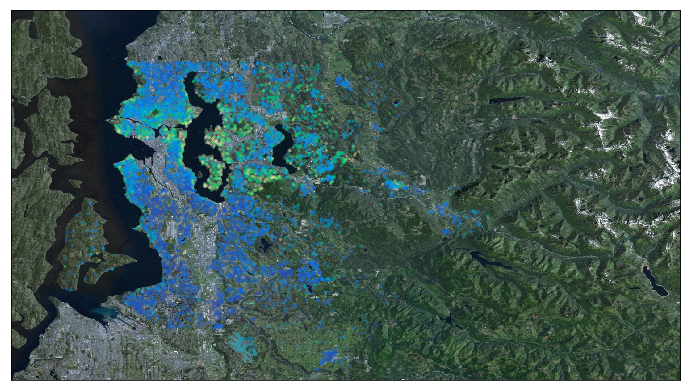

In [210]:
from mpl_toolkits.basemap import Basemap
from matplotlib.cm import terrain # import color map

plt.figure(figsize=(12, 12))

# Create map with basemap
m = Basemap(projection='cyl', resolution='i',
            llcrnrlat = df['lat'].min(), 
            llcrnrlon = df['long'].min()-0.1,
            urcrnrlat = df['lat'].max()+0.1, 
            urcrnrlon = df['long'].max())
# Load satellite image
m.arcgisimage(service='ESRI_Imagery_World_2D', 
              xpixels=1500, verbose=True)

# Draw stations with marker size according to ridership
#for line in total_riders.iterrows():
#    x,y = m(line[1]['GTFS Longitude'],line[1]['GTFS Latitude'])
#    size = line[1]['TOTAL_DIFF'] / 50000
#    plt.plot(x, y, 'o', markersize=size, color='red', alpha=0.5,
#             markeredgewidth=1, markeredgecolor='white')

plot_df = df[:10000]

for index, house in plot_df.iterrows():
    x,y = m(house['long'], house['lat'])
    
    # Get normalize price
    price_min, price_max = plot_df['price'].min(), plot_df['price'].max()*0.4
    price_norm = (house['price'] - price_min) / (price_max - price_min)
    
    # Get color code
    rgb_exp =price_norm
    rgb=[0,0,0]
    for i in range(3): rgb[i] = int(terrain(rgb_exp)[i]*255)
    color_hex = "#%02x%02x%02x" % (rgb[0], rgb[1], rgb[2])
    
    plt.plot(x,y, 'o', markersize=2, color=color_hex, alpha=0.3)
   
plt.show()